<h1>第08章 JSP中的文件操作<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#File类" data-toc-modified-id="File类-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>File类</a></span></li><li><span><a href="#读写文件的常用流" data-toc-modified-id="读写文件的常用流-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>读写文件的常用流</a></span><ul class="toc-item"><li><span><a href="#字节输入流" data-toc-modified-id="字节输入流-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>字节输入流</a></span></li><li><span><a href="#字节输出流" data-toc-modified-id="字节输出流-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>字节输出流</a></span></li><li><span><a href="#字符流" data-toc-modified-id="字符流-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>字符流</a></span></li><li><span><a href="#缓冲流" data-toc-modified-id="缓冲流-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>缓冲流</a></span></li></ul></li><li><span><a href="#RandomAccessFile类" data-toc-modified-id="RandomAccessFile类-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>RandomAccessFile类</a></span></li><li><span><a href="#文件上传" data-toc-modified-id="文件上传-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>文件上传</a></span></li><li><span><a href="#文件下载" data-toc-modified-id="文件下载-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>文件下载</a></span></li><li><span><a href="#小结" data-toc-modified-id="小结-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>小结</a></span></li><li><span><a href="#实验：RandomAccessFile流读文件" data-toc-modified-id="实验：RandomAccessFile流读文件-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>实验：RandomAccessFile流读文件</a></span></li><li><span><a href="#思考题" data-toc-modified-id="思考题-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>思考题</a></span></li></ul></div>

# File类

创建一个File对象的构造方法有3个：
```
File(String filename);
File(String directoryPath,String filename);
File(File f, String filename);
```
File类的下列方法获取文件本身的一些信息：
```
public String getName()  获取文件的名字。
public boolean canRead()  判断文件是否是可读的。
public boolean canWrite()  判断文件是否可被写入。
public boolean exists()  判断文件是否存在。
public long length()  获取文件的长度（单位是字节）。
public String getAbsolutePath()  获取文件的绝对路径。
```

例子8_1

In [2]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_1.jsp  
<%@ page contentType="text/html;charset=UTF-8" %>
<%@ page import="java.io.*"%> 
<HTML><body bgcolor=cyan><font Size=2>
<%  String jspPage=request.getServletPath();    //请求的页面的名称
    String webDir = request.getContextPath();//获取当前Web服务目录的名称
    webDir = webDir.substring(0); //去掉名称前面的目录符号：/
    jspPage =jspPage.substring(1); //去掉名称前面的目录符号：/
    File f= new File(""); //该文件认为在Tomcat引擎启动的目录中，即bin目录中
    String path = f.getAbsolutePath();
    int index = path.indexOf("bin");
    String tomcatDir = path.substring(0,index);//tomcat的安装目录
    File file=new File(tomcatDir+"/webapps/"+webDir,jspPage);
  %>
  文件<%=file.getName()%>是可读的吗？<b><%=file.canRead()%></b>
 <br>文件<%=file.getName()%>的长度：<b><%=file.length()%>字节</b>
 <br><%=file.getName()%>的父目录是:<br><b><%=file.getParent()%></b>
 <br> <%=file.getName()%>的绝对路径是：<br><b><%=file.getAbsolutePath()%>
</font></body></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_1.jsp


例子1中，获取用户访问的当前JSP页面的一些信息。内置对象request调用getContextPath()方法获取当前Web服务目录的名称。

[点击example8_1.jsp](http://127.0.0.1:8080/ch08/example8_1.jsp)，查看效果：

Example8_1.jsp的效果如图8.1所示.


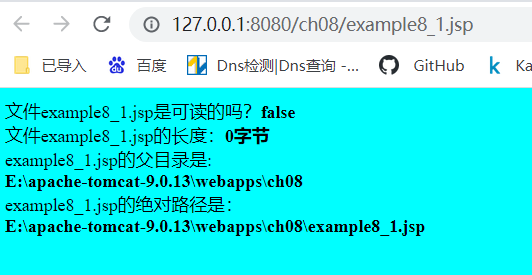

例子8_2

In [3]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_2.jsp  
<%@ page contentType="text/html;charset=UTF-8" %>
<%@ page import="java.io.*"%> 
<HTML><body bgcolor=#EEFFAD><font Size=2>
<% 
    String webDir = request.getContextPath();//获取当前Web服务目录的名称
    webDir = webDir.substring(0); //去掉名称前面的目录符号：/
    File f= new File(""); //该文件认为在Tomcat引擎启动的目录中，即bin目录中
    String path = f.getAbsolutePath();
    int index = path.indexOf("bin");
    String tomcatDir = path.substring(0,index);//tomcat的安装目录
    File dir=new File(tomcatDir+"/webapps/"+webDir+"/image");
%>
 <br> 在<%=webDir%>下创建一个新的目录：image,<br>成功创建了吗？
    <%=dir.mkdir()%>
 <br> image是目录吗？<%=dir.isDirectory()%>
</font></body></HTML>


Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_2.jsp


[点击example8_2.jsp](http://127.0.0.1:8080/ch08/example8_2.jsp)，查看效果：

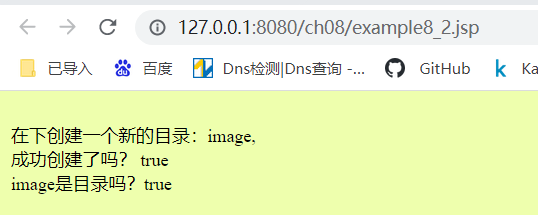

例子2在当前Web服务目录下创建一个名字是image的目录。 example8_2.jsp

例子8_3

```
public String[] list() 用字符串形式返回目录下的全部文件.
public File [] listFiles() 用File对象形式返回目录下的全部文件。
public String[] list(FilenameFilter obj) 该方法用字符串形式返回目录下的指定类型的所有文件。
public File [] listFiles(FilenameFilter obj) 该方法用File对象返回目录下的指定类型的所有文件。
```

In [4]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_3.jsp  
<%@ page contentType="text/html;charset=UTF-8" %>
<%@ page import="java.io.*"%> 
<%! class FileJSP implements FilenameFilter{ 
       String str=null;
       FileJSP(String s){
          str="."+s;
       }
       public boolean accept(File dir,String name){
          return name.endsWith(str);
       }              
    }
%>
<HTML><body bgcolor=#EEFFAD><font Size=2>
<% 
    String name="jsp";
    String webDir = request.getContextPath();
    webDir = webDir.substring(0); 
    File f= new File(""); 
    String path = f.getAbsolutePath();
    int index = path.indexOf("bin");
    String tomcatDir = path.substring(0,index);//tomcat的安装目录
    File dir=new File(tomcatDir+"/webapps/"+webDir);
%>
 <br> 在<%=dir%>下<%=name%>文件：
<%
    FileJSP file_jsp=new FileJSP(name);
    String file_name[]=dir.list(file_jsp);
    for(int i=0;i<file_name.length;i++)
       out.print("<br>"+file_name[i]);
%>
</font></body></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_3.jsp


[点击example8_3.jsp](http://127.0.0.1:8080/ch08/example8_3.jsp)，查看效果：

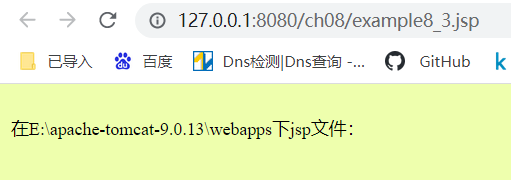

例子3（example8_3.jsp）中,列出当前Web目录下的JSP文件的名字。


# 读写文件的常用流

Java的I/O流提供一条通道程序，可以使用这条通道把源中的数据送给目的地。输入流的指向称做源，程序从指向源的输入流中读取源中的数据。输出流的指向是数据要去的一个目的地，程序通过向输出流中写入数据把信息传递到目的地，如图8.2、图8.3所示。


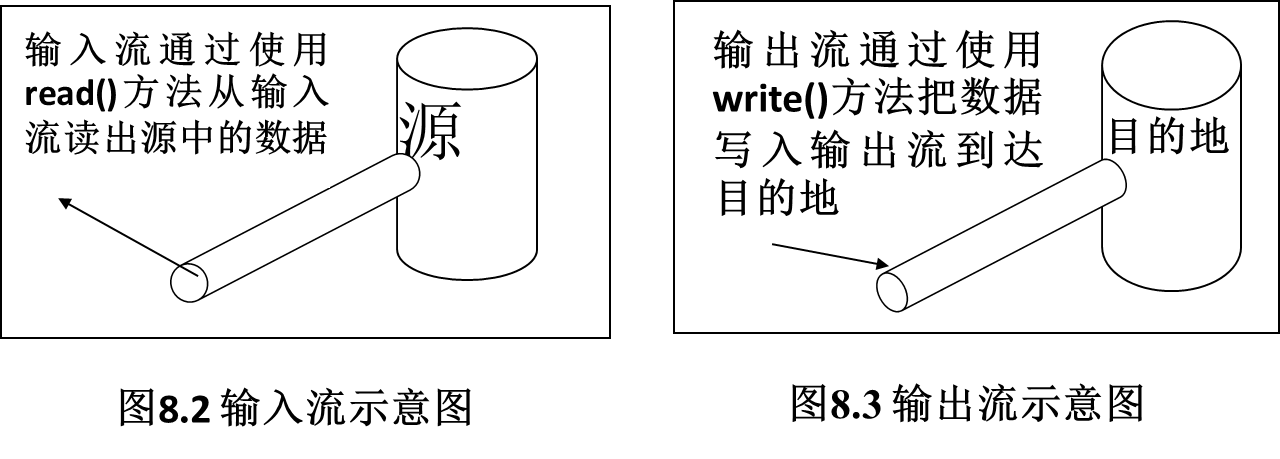

## 字节输入流

如果对文件读取需求比较简单，那么可以使用FileInputStream类（文件字节输入流），该类是InputStream类的子类（以字节为单位读取文件），该类的实例方法都是从InputStream类继承来的。


使用输入流通常包括4个基本步骤：
- 设定输入流的源
- 创建指向源的输入流
- 让输入流读取源中的数据
- 关闭输入流。

1．构造方法

```
FileInputStream(String name);
FileInputStream(File file);
```
第一个构造方法使用给定的文件名name创建FileInputStream流，第二个构造方法使用File对象创建FileInputStream流。参数name和file指定的文件称为输入流的源。


2．使用输入流读取字节

输入流的目的是提供读取源中数据的通道，程序可以通过这个通道读取源中的数据（如前面图8.2所示）。文件字节流可以调用从父类继承的read方法顺序地读取文件，只要不关闭流，每次调用read方法就顺序地读取文件中的其余内容，直到文件的末尾或文件字节输入流被关闭。
```
int read()   读取单个字节的数据，该方法返回字节值（0~255之间的一个整数），如果未读出字节就返回-1。
int read(byte b[])  试图读取b.length个字节到字节数组b中。
int read(byte b[], int off, int len) 试图读取len个字节到字节数组b中，参数off指定从字节数组的某个位置开始存放读取的数据。
```

3.关闭流

输入流都提供了关闭方法close()，尽管程序结束时会自动关闭所有打开的流，但是当程序使用完流后，显式地关闭任何打开的流仍是一个良好的习惯。

## 字节输出流

如果对文件写入需求比较简单，那么可以使用FileOutputStream类（文件字节输出流），它是OutputStream类的子类（以字节为单位向文件写入内容），该类的实例方法都是从OutputStream类继承来的。

使用输出流通常包括4个基本步骤：
- 给出输出流的目的地
- 创建指向目的地的输出流
- 让输出流把数据写入到目的地
- 关闭输出流。


1．构造方法

```
FileOutputStream(String name);
FileOutputStream(File file);

```
第一个构造方法使用给定的文件名name创建FileOutputStream流，第二个构造方法使用File对象创建FileOutputStream流。参数name和file指定的文件称为输出流的目的地。


2．使用输出流写字节

输出流的目的是提供通往目的地的通道，程序可以通过这个通道将程序中的数据写入到目的地（如前面图10.2所示）。文件字节流可以调用从父类继承的write方法顺序地写文件。FileOutStream流顺序地向文件写入内容，即只要不关闭流，每次调用write方法就顺序地向文件写入内容，直到流被关闭。。
```
void write(int n) 输出流调用该方法向目的地写入单个字节。
void write(byte b[]) 输出流调用该方法向目的地写入一个字节数组。
void write(byte b[],int off,int len) 给定字节数组中起始于偏移量off处取len个字节写到目的地。
```

3.关闭流

需要注意的是，在操作系统把程序所写到输出流上的那些字节保存到磁盘上之前，有时被存放在内存缓冲区中，通过调用close()方法，可以保证操作系统把流缓冲区的内容写到它的目的地，即关闭输出流可以把该流所用的缓冲区的内容冲洗掉（通常冲洗到磁盘文件上）。


## 字符流

与FileInputStream、FileOutputStream字节流相对应的是FileReader、FileWriter字符流（文件字符输入、输出流），FileReader和FileWriter分别是Reader和Writer的子类.字符输入流和输出流的read和write方法使用字符数组读写数据，即以字符为基本单位处理数据。

构造方法分别是：
```
FileReader(String filename); 
FileReader(File filename);
FileWriter (String filename); 
FileWriter (File filename);
FileWriter (String filename,boolean append);
FileWriter (File filename,boolean append);
```

## 缓冲流

BufferedReader类和BufferedWriter的构造方法分别是：
```
     BufferedReader(Reader in); 
     BufferedWriter (Writer out);
```
BufferedReader流能够读取文本行，方法是readLine(). BufferedReader和BufferedWriter类创建的对象称为缓冲输入、输出流，二者增强了读写文件的能力。


可以把BufferedReader和BufferedWriter称为上层流，把它们指向的字符流称为底层流。Java采用缓存技术将上层流和底层流连接。底层字符输入流首先将数据读入缓存，BufferedReader流再从缓存读取数据；BufferedWriter流将数据写入缓存，底层字符输出流会不断地将缓存中的数据写入到目的地。当BufferedWriter流调用flush()刷新缓存或调用close()方法关闭时，即使缓存没有益满，底层流也会立刻将缓存的内容写入目的地


例子4中有两个JSP页面：

example8_4_choiceFile.jsp和example8_4_showFile.jsp

一个Javabean和一个servlet。


在JSP页面example8_4_choiceFile.jsp选择一个文件，提交给servlet，该servlet负责读取文件的有关信息存放到JavaBean中，并请求JSP页面example8_4_showFile.jsp显示Javanean中的数据。


- web.xml

需要为ch8\WEB-INF中的web.xml文件添加如下子标记。


例子8_4中的模型

- 模型（Javabean）

Javabean模型Example8_4_Bean.java负责存储文件的相关信息，在本例子中Example8_4_Bean创建的Javabean模型的id是fileBean，scope取值是request。


In [18]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_4_Bean.java
package mybean.data;
public class Example8_4_Bean {
   String filePath,fileName,fileContent;
   long fileLength;
   public void setFilePath(String str){
      filePath=str;
   }
   public String getFilePath(){
      return filePath; 
   }
   public void setFileName(String str){
      fileName=str;
   }
   public String getFileName(){
      return fileName; 
   }
   public void setFileContent(String str){
      fileContent=str;
   }
   public String getFileContent(){
      return fileContent; 
   }
   public void setFileLength(long len){
      fileLength=len; 
   }
   public long getFileLength(){
      return fileLength; 
   }
}

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_4_Bean.java


In [19]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_4_Bean.java

例子8_4中的控制器

- 控制器（servlet）

Example8_4_Sevlet负责读取文件的内容，将结果存放到id是fileBean的Javabean数据模型中，然后用转发的方法请求example8_4_showFile.jsp显示fileBean中的数据。


In [29]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_4_Servlet.java
package myservlet.control;
import mybean.data.Example8_4_Bean;
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
public class Example8_4_Servlet extends HttpServlet{
   public void init(ServletConfig config) throws ServletException{
      super.init(config);
   }
   public void doPost(HttpServletRequest request,HttpServletResponse response)
                        throws ServletException,IOException{
      Example8_4_Bean fileBean=new Example8_4_Bean();  //创建Javabean对象
      request.setAttribute("fileBean",fileBean);
      String filePath=request.getParameter("filePath");
      String fileName=request.getParameter("fileName");
      fileBean.setFilePath(filePath);   //将数据存储在fileBean中 
      fileBean.setFileName(fileName);   
      try{   File f=new File(filePath,fileName);
             long length=f.length();
             fileBean.setFileLength(length);
             FileReader in=new FileReader(f) ;
             BufferedReader inTwo=new BufferedReader(in);
             StringBuffer stringbuffer=new StringBuffer(); 
             String s=null;
             while ((s=inTwo.readLine())!=null) 
                stringbuffer.append("\n"+s);
             String content=new String(stringbuffer);
             fileBean.setFileContent(content);
      }
      catch(IOException exp){
            fileBean.setFileContent("读取失败"+exp.toString());
      } 
      RequestDispatcher dispatcher=
      request.getRequestDispatcher("ch08/example8_4_showFile.jsp");
      dispatcher.forward(request, response);
   } 
   public  void  doGet(HttpServletRequest request,
HttpServletResponse response) 
                        throws ServletException,IOException{
      doPost(request,response);
   }
}

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_4_Servlet.java


In [30]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_4_Bean.java E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_4_Servlet.java

例子8_4中的视图（JSP页面）

- 视图（JSP页面）
 

在 example8_4_choiceFile.jsp页面可以输入文件的路径和名字，并提交给名字为handleFile的servlet对象。servlet对象负责读取文件，并将读取的内容以及相关的数据存储到id为fileBean的Javabean数据模型中，然后请求example8_4_showFile.jsp页面显示数据模型中的数据。example8_4_choiceFile.jsp和example8_4_showFile.jsp的效果如图8.4(a)和8.4(b)所示。


In [32]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_4_choiceFile.jsp  
<%@ page contentType="text/html;charset=UTF-8" %>
<HTML><BODY bgcolor=cyan><font size=2>
 <form action="/helpReadFile" method="post" name="form">
 输入文件的路径(如:d:/2000):
 <input type="text" name="filePath" size=12>
 <br>输入文件的名字(如:Hello.java):
 <input type="text" name="fileName" size=9>
 <br><input type="submit" value="读取" name="submit">
 </form>
</font></BODY></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_4_choiceFile.jsp


In [33]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_4_showFile.jsp
<%@ page contentType="text/html;charset=UTF-8" %>
 <jsp:useBean id="fileBean" type="mybean.data.Example8_4_Bean" scope="request"/>
<HTML><body bgcolor=#EEFFAE><font size=2>
  文件的位置: <jsp:getProperty name="fileBean" property="filePath"/>,
  文件的名字：<jsp:getProperty name="fileBean" property="fileName"/>,
  文件的长度：<jsp:getProperty name="fileBean" property="fileLength"/> 字节。
  <br>文件的内容：
  <br><TextArea  rows="6" cols="60">
       <jsp:getProperty name="fileBean" property="fileContent"/>
     </TextArea>
</font></body></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_4_showFile.jsp


[点击example8_4.jsp](http://127.0.0.1:8080/ch08/example8_4.jsp)，查看效果：

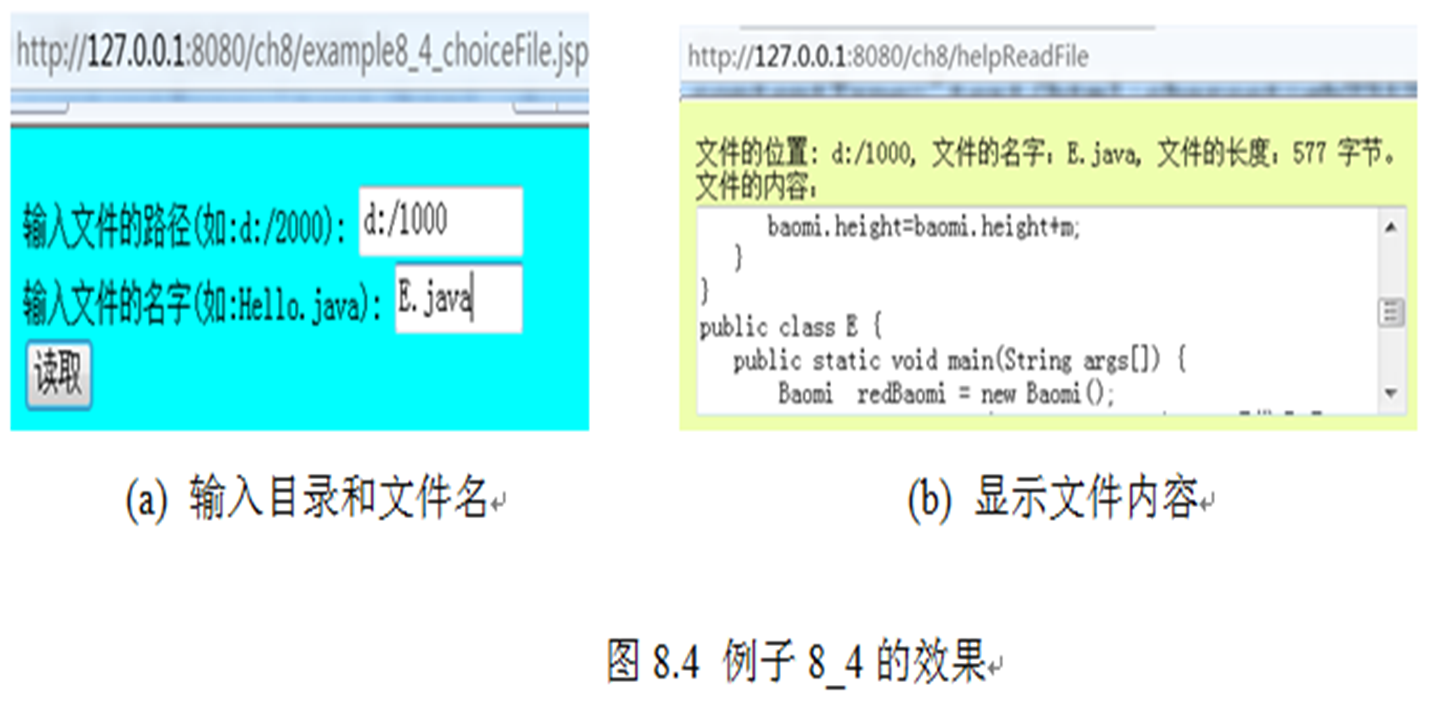

# RandomAccessFile类

RandomAccessFile类创建的流与前面的输入、输出流不同。RandomAccessFile类既不是输入流类InputStream类的子类，也不是输出流类Outputstream类的子类。习惯上，仍然称RandomAccessFile类创建的对象为一个流。RandomAccessFile流的指向既可以作为源也可以作为目的地。换句话说，当想对一个文件进行读写操作时，可以创建一个指向该文件的RandomAccessFile流，这样既可以从这个流读取文件的数据，也可以通过这个流向文件写入数

- RandomAccessFile类的构造方法

RandomAccessFile类的两个构造方法：
```
RandomAccessFile(String name,String mode) 
```
参数name用来确定一个文件名，给出创建的流的源（也是流的目的地）。参数mode取“r”（只读）或“rw”（可读写），决定创建的流对文件的访问权利。
```
RandomAccessFile(File file,String mode) 
```
参数file是一个File对象，给出创建的流的源（也是流的目的地）。参数mode取“r”（只读）或“rw”（可读写），决定创建的流对文件的访问权利。


- RandomAccessFile类的读写方法

```
readLine() 从文件中读取一个文本行
readUTF() 从文件中读取一个UTF字符串
seek(long a) 定位当前流在文件中的读写的位置
write(byte b[]) 写b.length个字节到文件
writeDouble(double v) 向文件写入一个双精度浮点值
writeInt(int v) 向文件写入一个int值
writeUTF(String s) 写入一个UTF字符串
getFilePointer()  获取当前流在文件中的读写的位置
```

# 文件上传

用户通过一个JSP页面上传文件给服务器时，该JSP页面必须含有File类型的表单，并且表单必须将ENCTYPE的属性值设成multipart/form-data。


例子8_5 

In [34]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_5.jsp  
<%@ page contentType="text/html;charset=UTF-8" %>
<HTML><body>
 <P>选择要上传的文件：<BR>
   <form action="example8_5_accept.jsp" method="post" ENCTYPE="multipart/form-data">
      <input type=FILE name="boy" size="38"> 
      <br><input type="submit" name ="g" value="提交">  
</form>
</body></HTML>

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_5.jsp


例子5中，用户通过example8_5.jsp页面选择的文本文件A.txt准备上传

A.txt: 


[点击example8_5.jsp](http://127.0.0.1:8080/ch08/example8_5.jsp)，查看效果：

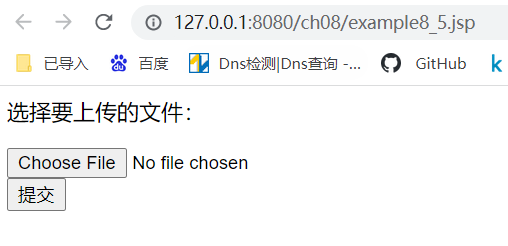

request获得一个输入流读取用户上传的全部信息，包括表单的头信息以及上传文件的内容。以后将讨论如何去掉表单的信息，获取文件的内容。            


例子5中在example8_5_accept.jsp页面，内置对象request调用方法getInputStream()获得一个输入流in，用FileOutputStream类再创建一个输出流o。输入流in读取用户上传的信息，输出流o将读取的信息写入文件B.txt。上传后的文件是B.txt(如图8.5)。


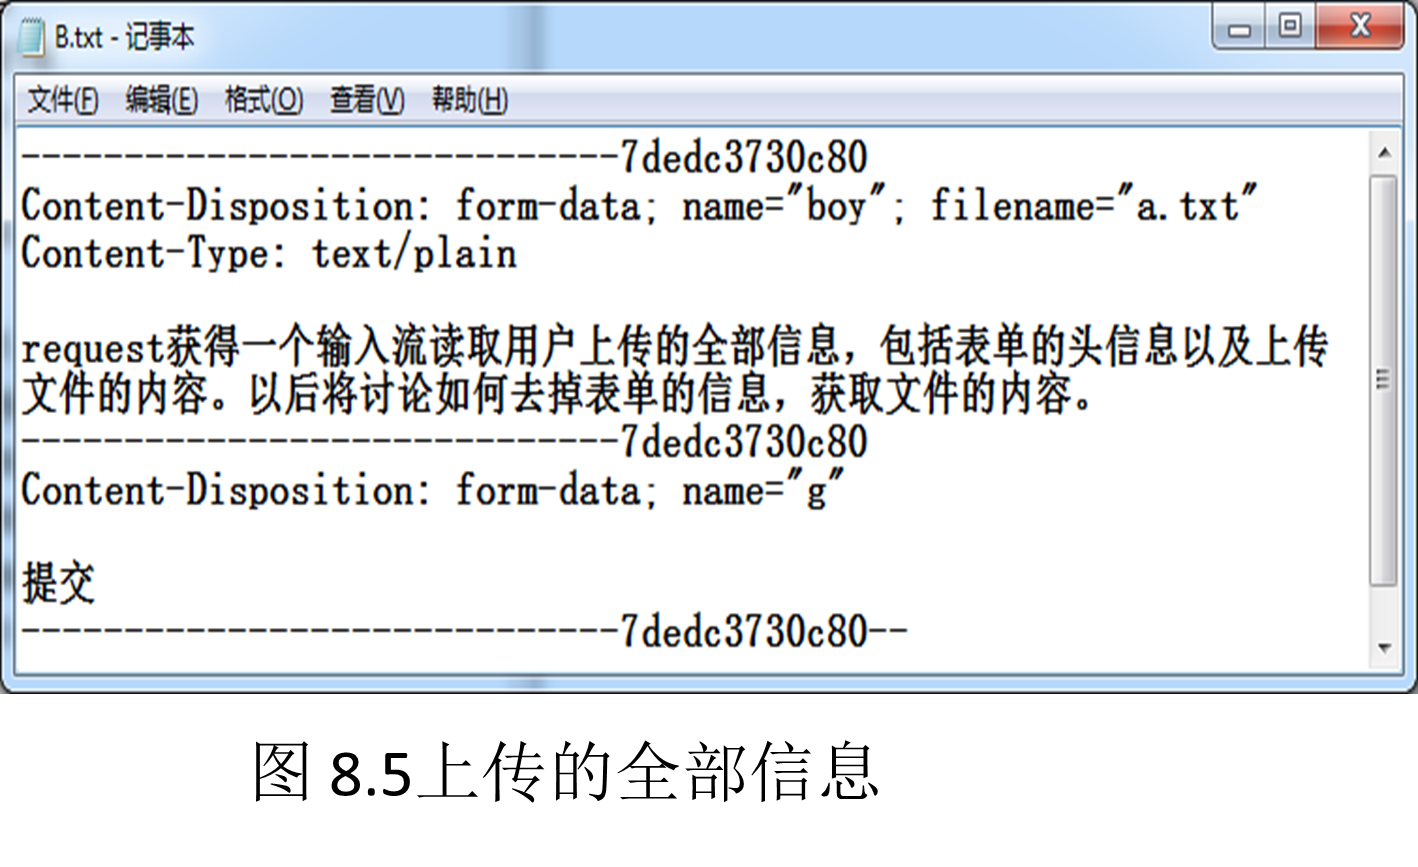

例子8_6

例子6中，通过输入、输出流技术获取文件的内容，即去掉表单的信息。

- 不同用户的session对象互不相同这一特点，将用户提交的全部信息首先保存成一个临时文件，该临时文件的名字是用户的session对象的id.
- 然后读取该临时文件的第2行，因为这一行中含有用户上传的文件的名字，再获取第4行结束的位置，以及倒数第6行结束的位置，因为这两个位置之间的内容是上传文件的内容，然后将这部分内容存入文件，该文件的名字和用户上传的文件的名字保持一致
- 最后删除临时文件。


- web.xml

需要为ch8\WEB-INF中的web.xml文件添加如下子标记。


例子8_6中的模型

- 模型（Javabean）

Javabean模型Example8_6_Bean.java负责存储文件的相关信息，在本例子中Example8_6_Bean创建的Javabean模型的id是fileBean，scope取值是request。


In [36]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_6_Bean.java
package mybean.data;
public class Example8_6_Bean {
   String fileName="";
   String mess="";
   public void setFileName(String str){
      fileName=str;
   }
   public String getFileName(){
      return fileName; 
   }
   public void setMess(String str){
      mess=str;
   }
   public String getMess(){
      return mess; 
   }
}


Writing E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_6_Bean.java


In [37]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_6_Bean.java

例子8_6中的控制器

- 控制器（servlet）
Example8_6_Sevlet负责将用户提交的文件保存到服务器端，并将文件的有关信息存放到id是fileBean的Javabean数据模型中，然后用转发的方法请求example8_6.jsp显示fileBean中的数据。


In [39]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_6_Servlet.java
package myservlet.control;
import mybean.data.Example8_6_Bean;
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
public class Example8_6_Servlet extends HttpServlet{
   public void init(ServletConfig config) throws ServletException{
      super.init(config);
   }
   public void doPost(HttpServletRequest request,HttpServletResponse response)
                        throws ServletException,IOException{
      request.setCharacterEncoding("UTF-8");
      Example8_6_Bean fileBean=new Example8_6_Bean();  //创建Javabean对象
      request.setAttribute("fileBean",fileBean);
      String fileName=null;
      HttpSession session=request.getSession(true);
      try{  
         //用客户的session对象的Id建立一个临时文件
          String tempFileName=(String)session.getId();
          String webDir = request.getContextPath();
          webDir = webDir.substring(1); 
          File f= new File(""); 
          String path = f.getAbsolutePath();
          int index = path.indexOf("bin");
          String tomcatDir = path.substring(0,index);//tomcat的安装目录
          File dir=new File(tomcatDir+"/webapps/"+webDir+"/image");
          dir.mkdir();          
          //建立临时文件f1
          File f1=new File(dir,tempFileName);
          FileOutputStream o=new FileOutputStream(f1);
           //将客户上传的全部信息存入f1
          InputStream in=request.getInputStream();
          byte b[]=new byte[10000];
          int n;
          while( (n=in.read(b))!=-1){
             o.write(b,0,n);
          }
          o.close();
          in.close();
           //读取临时文件f1，从中获取上传文件的名字和上传文件的内容
          RandomAccessFile randomRead=new RandomAccessFile(f1,"r");
           //读出f1的第2行，析取出上传文件的名字
          int second=1;
          String secondLine=null;
          while(second<=2) { 
              secondLine=randomRead.readLine();
              second++;
          }
          //获取f1中第2行中"filename"之后“=”出现的位置:
          int position=secondLine.lastIndexOf("=");
           //客户上传的文件的名字是
          fileName=secondLine.substring(position+2,secondLine.length()-1);
          randomRead.seek(0); //再定位到文件f1的开头
          //获取第4行回车符号的位置
          long  forthEndPosition=0;
          int forth=1;
          while((n=randomRead.readByte())!=-1&&(forth<=4)){  
             if(n=='\n'){
                forthEndPosition=randomRead.getFilePointer();
                forth++;
             }
          }
          //根据客户上传文件的名字，将该文件存入磁盘
          byte  cc[]=fileName.getBytes("ISO-8859-1");
          fileName=new String(cc);
          File f2= new File(dir,fileName);
          RandomAccessFile randomWrite=new RandomAccessFile(f2,"rw"); 
          //确定出文件f1中包含客户上传的文件的内容的最后位置，即倒数第6行
          randomRead.seek(randomRead.length());
          long endPosition=randomRead.getFilePointer();
          long mark=endPosition;
          int j=1;
          while((mark>=0)&&(j<=6)) { 
              mark--;
              randomRead.seek(mark);
              n=randomRead.readByte();
              if(n=='\n'){
                 endPosition=randomRead.getFilePointer();
                 j++;
              }
          }
          //将randomRead流指向文件f1的第4行结束的位置
          randomRead.seek(forthEndPosition);
          long startPoint=randomRead.getFilePointer();
         //从f1读出客户上传的文件存入f2（读取第4行结束位置和倒数第6行之间的内容）
          while(startPoint<endPosition-1){
              n=randomRead.readByte();
              randomWrite.write(n); 
              startPoint=randomRead.getFilePointer();
          }
          randomWrite.close();
          randomRead.close();
          
          fileBean.setMess("上传成功"); 
          fileBean.setFileName(fileName);   
          f1.delete(); //删除临时文件
       }
       catch(Exception ee) {
          fileBean.setMess("没有选择文件或上传失败"); 
       }
      RequestDispatcher dispatcher=
      request.getRequestDispatcher("ch08/example8_6.jsp");
      dispatcher.forward(request, response);
   } 
   public  void  doGet(HttpServletRequest request,
                      HttpServletResponse response) 
                        throws ServletException,IOException{
      doPost(request,response);
   }
}

Writing E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_6_Servlet.java


In [40]:
!javac -encoding UTF-8 E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\mybean\data\Example8_6_Bean.java E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_6_Servlet.java

例子8_6中的视图（JSP页面）

In [35]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_6.jsp  
<%@ page contentType="text/html;charset=UTF-8" %>
<%@ page import ="java.io.*" %>
 <jsp:useBean id="fileBean" class="mybean.data.Example8_6_Bean" scope="request"/>
<HTML><body>
 <P>选择要上传的文件：<BR>
 <form action="/upFile" method="post" ENCTYPE="multipart/form-data">
      <input type=FILE name="boy" size="45"> 
      <br> <input type="submit" name ="boy" value="提交">
 </form>
 <br> 上传的文件名字：
 <jsp:getProperty name="fileBean" property="fileName"/> 
   <br> 上传反馈：
 <jsp:getProperty name="fileBean" property="mess"/>
 <%
    String name=fileBean.getFileName();
    boolean boo =name.endsWith(".jpg");
    boo = boo||name.endsWith(".gif");
    if(boo) {
 %>     <image src = "image/<%=name%>" width=200 height =200><%=name %></image>
 <% }
    else {
 %>     <%=name %>
 <% }
 %>
</body></HTML>


Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_6.jsp


- 视图（JSP页面）

example8_6.jsp页面负责提交上传文件给名字是upFile的servlet，并负责显示Javabean模型中的数据，如果Javabean模型中存放的文件不是图像文件就显示文件的名字，如果是图像文件，不仅显示文件的名字，同时也显示当前图像。example8_6.jsp效果如图8.6。


[点击example8_6.jsp](http://127.0.0.1:8080/ch08/example8_6.jsp)，查看效果：

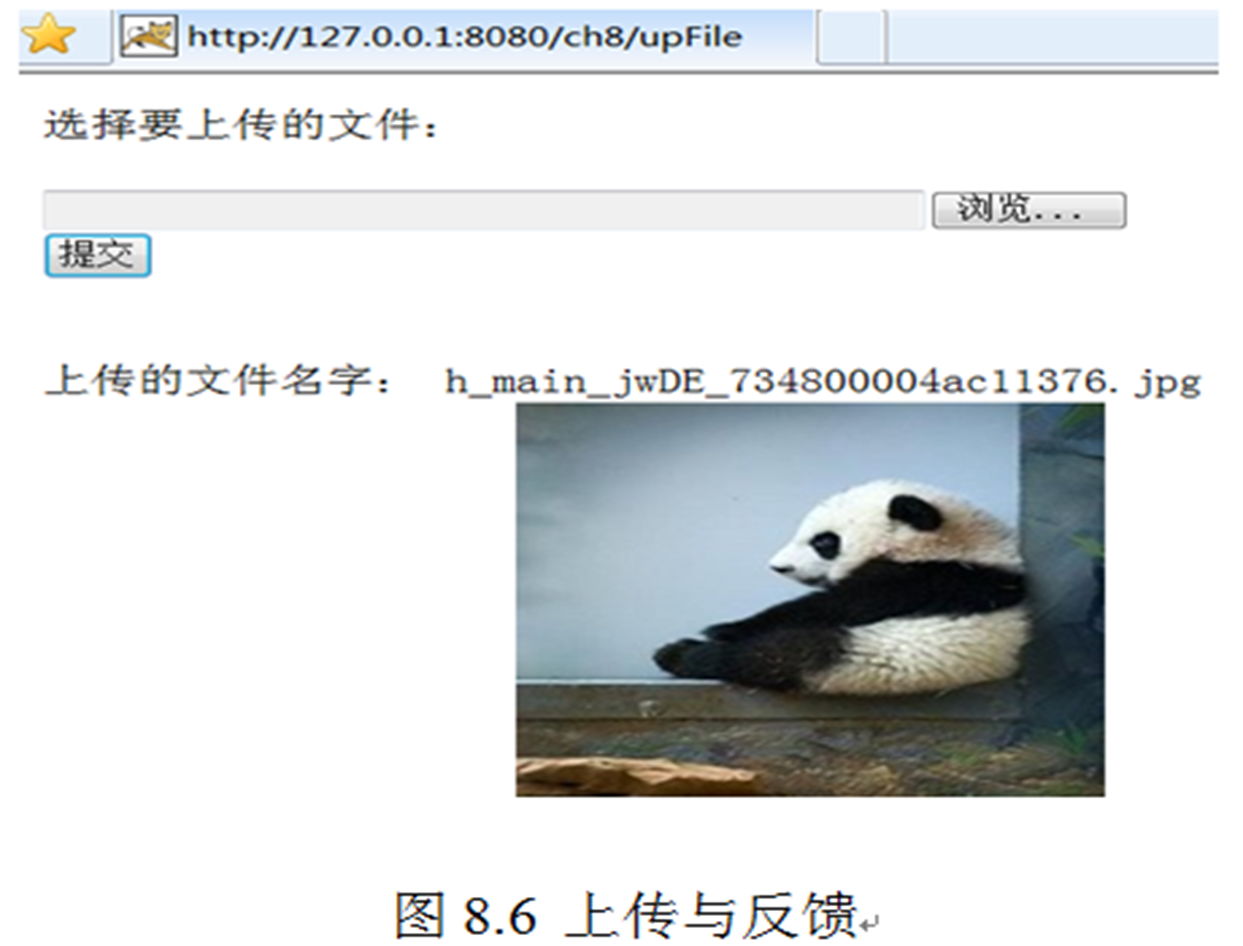

# 文件下载

JSP内置对象response调用方法getOutputStream()可以获取一个指向用户的输出流，服务器将文件写入这个流，用户就可以下载这个文件了。当提供下载功能时，应当使用response对象向用户发送HTTP头信息，这样用户的浏览器就会调用相应的外部程序打开下载的文件，response调用setHeader方法添加下载头的格式如下：


例子8_7

例子7中，用户在example8_7.jsp页面选择一个要下载的文件，将该文件的名字提交给名字是loadFile的servlet(Example8_7_Sevlet负责创建servlet)，servlet将用户选择的文件发送给用户，即提供下载。


- web.xml

需要为ch8\WEB-INF中的web.xml文件添加如下子标记。


例子8_7中的控制器

- 控制器（servlet）

Example8_7_Sevlet负责创建servlet)，servlet将用户选择的文件发送给用户，即提供下载。loadFile的效果如图8.7(b)。


In [41]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_7_Servlet.java
package myservlet.control;
import java.io.*;
import javax.servlet.*;
import javax.servlet.http.*;
public class Example8_7_Servlet extends HttpServlet{
   public void init(ServletConfig config) throws ServletException{
      super.init(config);
   }
   public void doPost(HttpServletRequest request,HttpServletResponse response)
                        throws ServletException,IOException{
      request.setCharacterEncoding("UTF-8");
      String filePath=request.getParameter("filePath");
      String fileName=filePath.substring(filePath.lastIndexOf("/")+1);
      response.setHeader("Content-disposition","attachment;filename="+fileName);   
      try{ //读取文件,并发送给用户下载:
        File f=new File(filePath);
        FileInputStream in=new FileInputStream(f);
        OutputStream out=response.getOutputStream();
        int n=0;
        byte b[]=new byte[500];
        while((n=in.read(b))!=-1)
           out.write(b,0,n);
        out.close();
        in.close(); 
     }
     catch(Exception exp){
     }
   } 
   public  void  doGet(HttpServletRequest request,
                      HttpServletResponse response) 
                        throws ServletException,IOException{
      doPost(request,response);
   }
}


Writing E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_7_Servlet.java


In [43]:
!javac -encoding UTF-8  E:\apache-tomcat-9.0.13\webapps\ROOT\WEB-INF\classes\myservlet\control\Example8_7_Servlet.java

例子8_7中的视图（JSP页面）

In [44]:
%%file E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_7.jsp  
<%@ page contentType="text/html;charset=UTF-8" %>
<HTML><body bgcolor=#FFBBFE>
<form action="/loadFile" method=post name=form>
       选择要下载的文件：<br>
       <Select name="filePath" size=3>
          <Option Selected value="d:/2000/E.java">E.java
          <Option value="d:/2000/first.jsp">first.jsp
          <Option value="d:/2000/book.zip">book.zip
           <Option value="d:/2000/A.txt">A.txt
       </Select> 
       <br><INPUT TYPE="submit" value="提交" >
   </form> 
</body></HTML> 

Overwriting E:\apache-tomcat-9.0.13\webapps\ROOT\ch08\example8_7.jsp


- 视图（JSP页面）

用户在example8_7.jsp页面选择一个要下载的文件，将该文件的名字提交给名字是loadFile的servlet(Example8_7_Sevlet负责创建servlet)。效果如图8.7(a).


[点击example8_7.jsp](http://127.0.0.1:8080/ch08/example8_7.jsp)，查看效果：

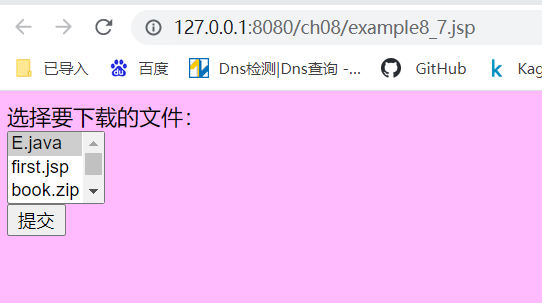

# 小结

- 输入流的指向称为源，程序从指向源的输入流中读取源中的数据。而输出流的指向是数据要去的目的地，程序通过向输出流中写入数据把信息送往目的地。
- FileInputStream和FileReader流都顺序地读取文件，只要不关闭流，每次调用read方法就顺序地读取源中其余的内容，直到源的末尾或流被关闭。二者的区别是，FileInputStream流以字节（byte）为单位读取文件；FileReader流以字符（char）为单位读取文件。
- FileOutStream流和FileWriter 顺序地写文件，只要不关闭流，每次调用writer方法就顺序地向输出流写入内容，直到流被关闭。二者的区别是，FileOutStream流以字节（byte）为单位写文件；FileWriter流以字符（char）为单位写文件。
- RandomAccessFile流的指向既可以作为源也可以作为目的地，在读写文件时可以调用seek方法改变读写位置。


# 实验：RandomAccessFile流读文件

一、要求

使用MVC模式按行读取服务器上的文件。在一个JSP页面中输人文件的路径、名字,单击“读取”按钮,将信息提交给servlet,servlet将读取文件放入Javabean数据模型中,然后请求JSP页面显示Javabean中的数据。

二、参考代码

Shiyan2_Bean.java

readFile.jsp

Shiyan2_Servlet.java

三、结果展示

运行readFile.jsp并输入文件所在路径及文件名字:

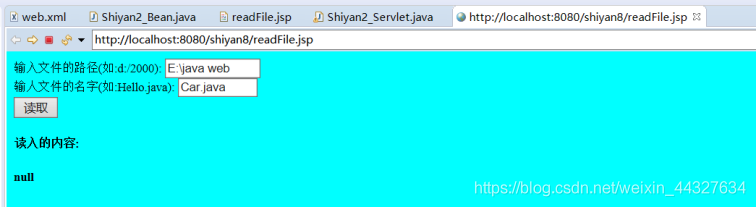

点击提交后会读取磁盘E:\java web目录下的Car.java文件：

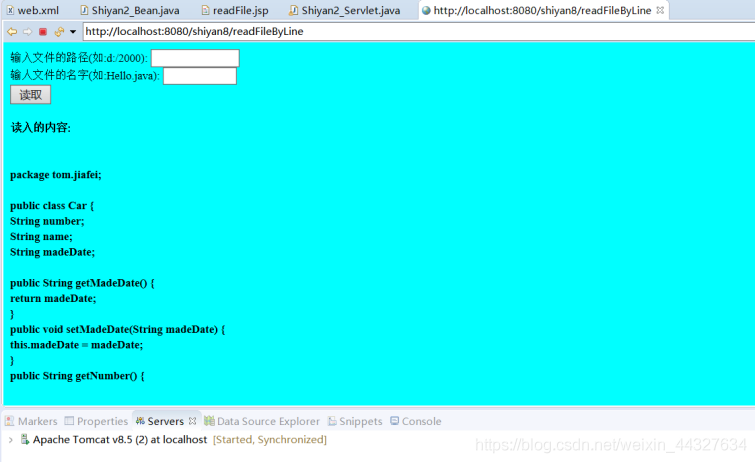

# 思考题